`import library`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

`connect GoogleDrive`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


`read data`

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/project/PORTODATA/gojekdataset/gofood_dataset.csv')
data.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,NaN,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...


`check unique / value variabel`

In [ ]:
for i in data.columns:
  print('Value Variabel {} adalah {}'.format(i,data[i].unique()))
  print('Jumlah Value Variabel {} adalah {} \n'.format(i,data[i].nunique()))

Value Variabel merchant_name adalah ['330 Kopi, Ciledug' 'Abe Steak, Cibubur' 'Abuba Steak, Cikarang'
 'Aneka Gorengan Siaga' 'Arangsimpur' 'Ayam Trolok' 'BABAKARAN BUNDA DAFA'
 'Bakerman, SCBD' 'Bakmi Kun' 'Bakmi Lopui 93' 'Bakso Titoti, Parung'
 'Banzai!, Bogor Utara' 'Sosis Bakar By Basis.Kuy, Intercon'
 'Bebek Boedjang, BSD' 'Boonsikdang, Hublife Jakarta'
 'Bunga Bakery, Cibinong' 'Bunga Bakery, Depok' 'Burger Bros, Bintaro'
 'Burger Bros, Ciledug' 'Burger Naura' 'C7HomeCoffee' 'Cafe OTSS'
 'Cake Pandeglang Cake' 'Chateraise, Senayan City' 'CIATER BEACH'
 'Cimory Condet, Balekambang' 'Cinepolis, Pondok Kelapa' 'Coffee First'
 'Corndog Doona, Pinang' 'Corndog Mozarella' 'Cotta Coffee, Jatiwaringin'
 'Crackling' 'Dapur Aliqa, Gembong' 'Dapur Cokelat, Cibubur'
 'Dapur Cokelat, Ciputat' 'Dapur Cokelat, Ciracas' 'Dapur Cokelat, Depok'
 'Dear Butter, Pakubuwono' 'Dough Lab, Senopati' 'DuriAnd, Bogor'
 'Emados Shawarma, Condet' 'Emados Shawarma, Depok' 'Faasos, Bintaro'
 'Faasos, Blok M' 

`check tipe data dan missing value`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


`persentase missing value`

In [ ]:
(data.isna().sum()*100/len(data)).sort_values(ascending=False)

discount_price    93.941808
description       51.941586
merchant_name      0.000000
merchant_area      0.000000
category           0.000000
display            0.000000
product            0.000000
price              0.000000
isDiscount         0.000000
dtype: float64

In [ ]:
data_with_desc_disc = data.copy()
discprice = data_with_desc_disc[data_with_desc_disc.discount_price.notnull()]
datadesc = data_with_desc_disc[data_with_desc_disc.description.notnull()]

#**Data Preprocessing**

`split variabel, hapus missingvalue`

In [ ]:
data[['Brand','Lokasi']] = data['merchant_name'].str.split(',',expand=True,n=2)
data.drop(['merchant_name','discount_price','description'],axis=1,inplace=True)
data.head()

,merchant_area,category,display,product,price,isDiscount,Brand,Lokasi
0,jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0,330 Kopi,Ciledug
1,jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0,330 Kopi,Ciledug
2,jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0,330 Kopi,Ciledug
3,jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0,330 Kopi,Ciledug
4,jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0,330 Kopi,Ciledug


In [ ]:
#membuat lowercase
data = data.apply(lambda x: x.astype(str).str.lower())

#hapus tanda baca
data['Brand'] = data['Brand'].str.replace(r'[^\w\s]+', '')
data['display'] = data['display'].str.replace(r'[^\w\s]+', '')

#hapus whitespace
data = data.apply(lambda x: x.astype(str).str.strip())

data_category = data.copy()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,merchant_area,category,display,product,price,isDiscount,Brand,Lokasi
0,jakarta,kopi/minuman/roti,signature,hot almara kopi (kopi susu gula aren),20000.0,0,330 kopi,ciledug
1,jakarta,kopi/minuman/roti,signature,ice almara kopi (kopi susu gula aren),22000.0,0,330 kopi,ciledug
2,jakarta,kopi/minuman/roti,signature,hot millsis,20000.0,0,330 kopi,ciledug
3,jakarta,kopi/minuman/roti,signature,ice millsis,20000.0,0,330 kopi,ciledug
4,jakarta,kopi/minuman/roti,signature,hot millbro,22000.0,0,330 kopi,ciledug


#**EDA**

Text(0, 0.5, '')

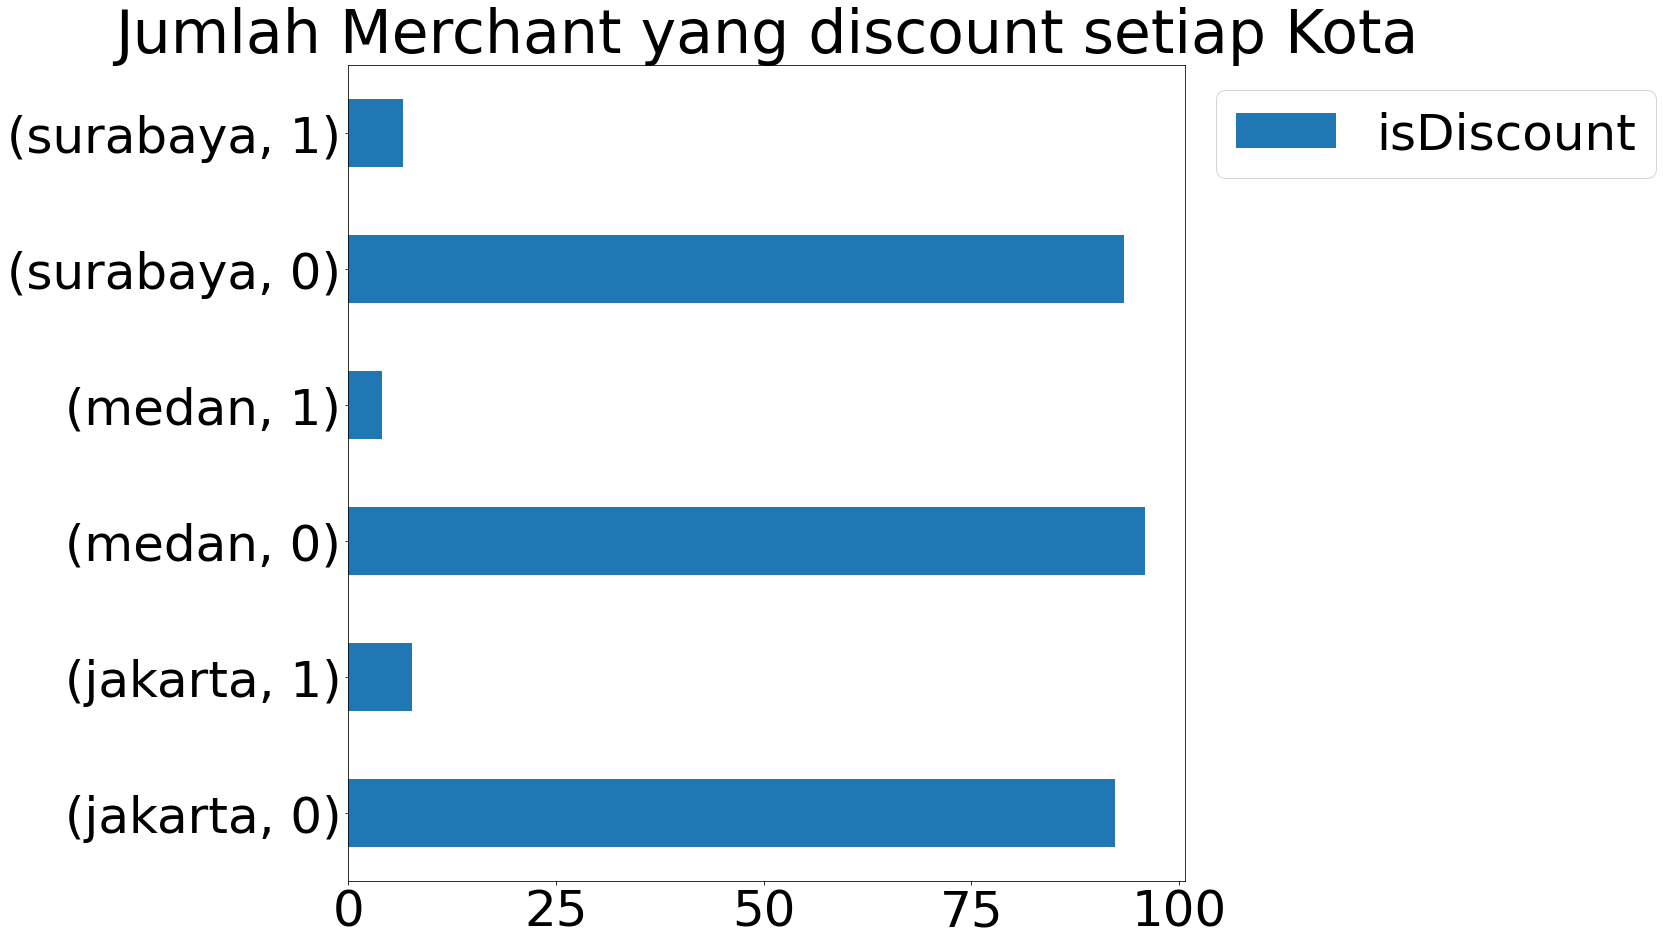

In [288]:
df = data.groupby(['merchant_area','isDiscount']).agg({'isDiscount': 'count'})
percen = data.groupby(['merchant_area']).agg({'isDiscount': 'count'})
df = df.div(percen, level='merchant_area') * 100
df.plot(kind='barh')
plt.title("Jumlah Merchant yang discount setiap Kota")
plt.legend(loc='upper center',bbox_to_anchor=(1.3, 1))
plt.ylabel('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

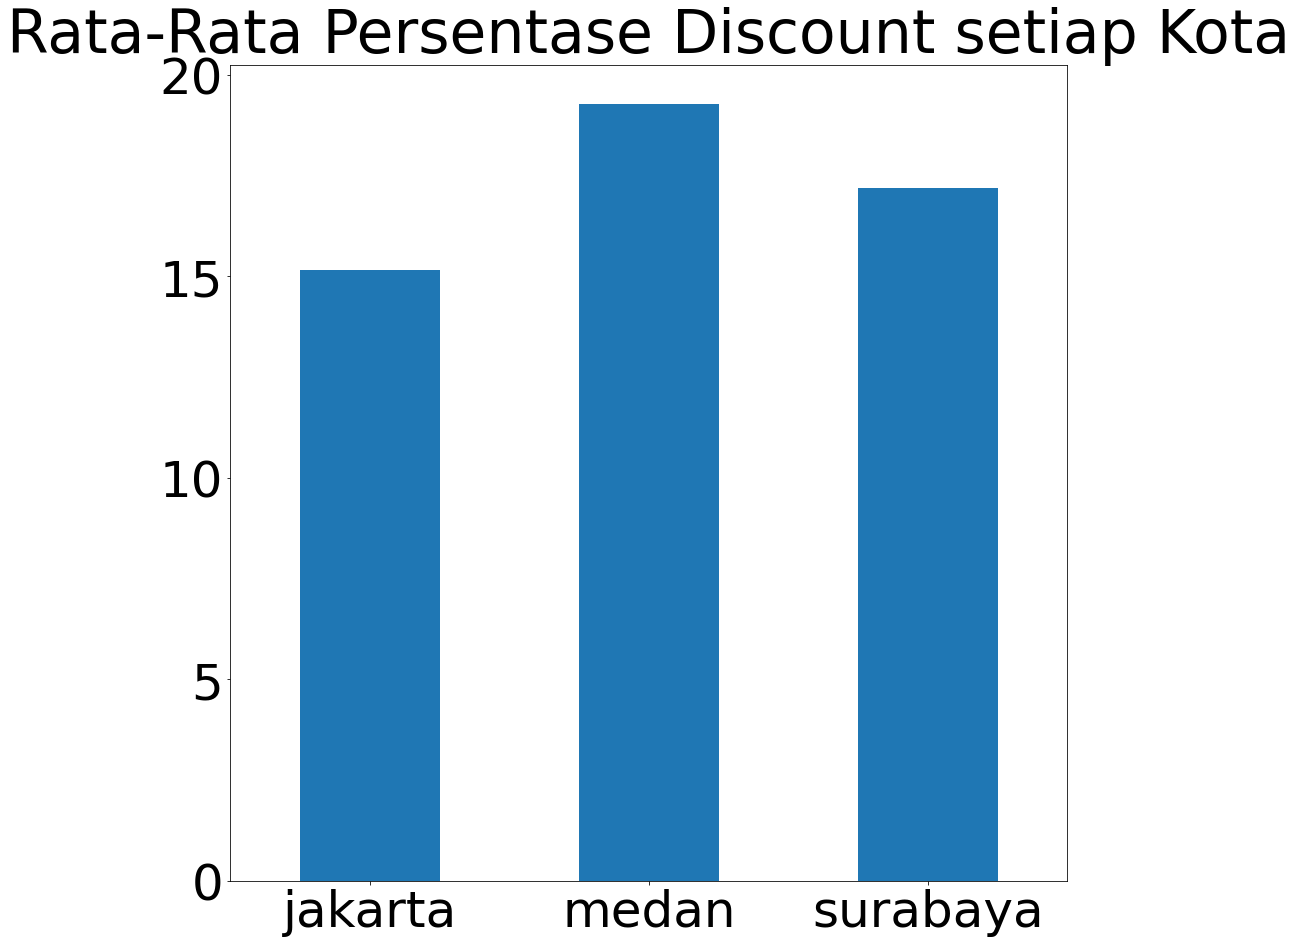

In [ ]:
discprice = data_with_desc_disc[data_with_desc_disc.discount_price.notnull()]
discprice['perc_disc'] = 100*(discprice['price']-discprice['discount_price'])/discprice['price']
discprice.groupby('merchant_area').mean()['perc_disc'].plot(kind='bar')
plt.title("Rata-Rata Persentase Discount setiap Kota")
plt.xlabel('')
plt.xticks(rotation='0')

In [ ]:
disc = pd.DataFrame()
col = discprice['merchant_area'].unique()

for i in col:
  filter = discprice[discprice.merchant_area==i].sort_values("perc_disc",ascending=False).head(50)
  filter.drop(filter.columns[[2,3,4,5,6,7,8]],axis=1,inplace=True)
  filter.drop_duplicates('merchant_name',inplace=True)
  disc = pd.concat([disc, filter])

print(disc)

                         merchant_name merchant_area  perc_disc
12554        Starbucks, Sudirman Bogor       jakarta  56.140351
1829             Corndog Doona, Pinang       jakarta  50.000000
2846          FamilyMart, Sequis Tower       jakarta  50.000000
13956                    XXI Cafe, PGC       jakarta  36.363636
4106              HokBen, Bogor Yasmin       jakarta  35.000000
14044                   Ahmeds Kitchen         medan  68.181818
15499             Bolen Quemami Bakery         medan  60.606061
29238           Warung Jivano, Marelan         medan  59.701493
27367       Starbucks, Multatuli Medan         medan  56.140351
27957       Sushi Yay, Medan Setiabudi         medan  50.000294
25505         Richeese Factory, Binjai         medan  50.000000
26746       Shawarma Sultan, Setiabudi         medan  43.290043
15839           Burger King, Ring Road         medan  37.962963
14979  Besty Cemilan, Kapten Sumarsono         medan  37.254902
19131         Grand Liberty Restaurant  

In [ ]:
df = pd.DataFrame(data.groupby('merchant_area')['Brand'].value_counts().unstack(fill_value=0).T)

jkt = df.sort_values(['jakarta'],ascending=False).head(5)
display('Jakarta most Brand Merchant =', jkt)
print('\n')
mdn = df.sort_values(['medan'],ascending=False).head(5)
display('Medan most Brand Merchant =', mdn)
print('\n')
sby = df.sort_values(['surabaya'],ascending=False).head(5)
display('Surabaya most Brand Merchant =', sby)

'Jakarta most Brand Merchant ='

merchant_area,jakarta,medan,surabaya
Brand,,,
lawson,1795,0,0
mcdonalds,905,125,250
dapur cokelat,549,0,0
michelle bakery,474,0,0
kfc,393,400,63


'Medan most Brand Merchant ='

merchant_area,jakarta,medan,surabaya
Brand,,,
choco bakery,0,592,0
bika ambon zulaikha,0,435,0
zeribowl,0,426,0
kfc,393,400,63
chicken crush,0,400,0


'Surabaya most Brand Merchant ='

merchant_area,jakarta,medan,surabaya
Brand,,,
holland bakery,240,0,594
kampoeng roti,0,0,331
haus,0,0,273
satria roti,0,0,257
warung pindo,0,0,254


In [ ]:
df = df[(df.jakarta != 0) & (df.medan != 0) & (df.surabaya != 0)]
df.sort_values(['jakarta','medan','surabaya'],ascending=False).head(5)

merchant_area,jakarta,medan,surabaya
Brand,,,
mcdonalds,905,125,250
kfc,393,400,63
menantea,280,40,116
burger bros,229,69,69
dear butter,26,26,54


In [ ]:
data_category[['category1','category2','category3','category4','category5']] = data_category['category'].str.split('/',expand=True,n=5)

In [ ]:
cat1 = data_category['category1'].unique().tolist()
cat2 = data_category['category2'].unique().tolist()
cat3 = data_category['category3'].unique().tolist()
cat4 = data_category['category4'].unique().tolist()
cat5 = data_category['category5'].unique().tolist()

cat = cat1 + cat2 + cat3 + cat4 + cat5
cat = list(set(cat))
cat = [x for x in cat if x is not None]
print(cat)

['thailand', 'bakmie', 'minuman', 'sate', 'aneka nasi', 'kopi', 'india', 'chinese', 'cepat saji', 'roti', 'bakso & soto', 'ayam & bebek', 'sweets', 'jajanan', 'seafood', 'jepang', 'korea', 'barat', 'martabak', 'timur tengah', 'pizza & pasta']


In [ ]:
city = data['merchant_area'].unique()
kota = []
kategori = []
jlh_merchant = []

for i in city:
  for j in cat:
    data_city = data[data.merchant_area==i]
    n = data_city[data_city.category.str.startswith(j)].shape[0]
    kota.append(i)
    kategori.append(j)
    jlh_merchant.append(n)
    #print('kota {} jumlah merchent brand {} sebanyak {}'.format(i,j,n))

df = pd.DataFrame(list(zip(kota, kategori, jlh_merchant)),columns =['Kota', 'Kategori', 'jumlah merchant'])

jkt = df[df.Kota=='jakarta'].sort_values(['jumlah merchant'],ascending=False).head(5)
display('Jakarta most Category Merchant =', jkt)
print('\n')
mdn = df[df.Kota=='medan'].sort_values(['jumlah merchant'],ascending=False).head(5)
display('Medan most Category Merchant =', mdn)
print('\n')
sby = df[df.Kota=='surabaya'].sort_values(['jumlah merchant'],ascending=False).head(5)
display('Surabaya most Category Merchant =', sby)

'Jakarta most Category Merchant ='

,Kota,Kategori,jumlah merchant
2,jakarta,minuman,1967
13,jakarta,jajanan,1785
8,jakarta,cepat saji,1755
4,jakarta,aneka nasi,1397
9,jakarta,roti,1368


'Medan most Category Merchant ='

,Kota,Kategori,jumlah merchant
25,medan,aneka nasi,2751
34,medan,jajanan,2368
23,medan,minuman,2206
30,medan,roti,1932
29,medan,cepat saji,1481


'Surabaya most Category Merchant ='

,Kota,Kategori,jumlah merchant
44,surabaya,minuman,2617
46,surabaya,aneka nasi,2333
55,surabaya,jajanan,2100
51,surabaya,roti,2035
43,surabaya,bakmie,1191


In [ ]:
most_cat = ['minuman','jajanan','aneka nasi','cepat saji','roti','bakmie','kopi','jepang']

In [ ]:
jkt = df[df.Kota=='jakarta'].sort_values(['jumlah merchant'],ascending=True).head(5)
display('Jakarta few Category Merchant =', jkt)
print('\n')
mdn = df[df.Kota=='medan'].sort_values(['jumlah merchant'],ascending=True).head(5)
display('Medan few Category Merchant =', mdn)
print('\n')
sby = df[df.Kota=='surabaya'].sort_values(['jumlah merchant'],ascending=True).head(5)
display('Surabaya few Category Merchant =', sby)

'Jakarta few Category Merchant ='

,Kota,Kategori,jumlah merchant
0,jakarta,thailand,0
19,jakarta,timur tengah,0
7,jakarta,chinese,6
6,jakarta,india,56
3,jakarta,sate,57


'Medan few Category Merchant ='

,Kota,Kategori,jumlah merchant
40,medan,timur tengah,0
28,medan,chinese,7
24,medan,sate,15
27,medan,india,19
21,medan,thailand,45


'Surabaya few Category Merchant ='

,Kota,Kategori,jumlah merchant
48,surabaya,india,0
61,surabaya,timur tengah,30
62,surabaya,pizza & pasta,51
58,surabaya,korea,78
45,surabaya,sate,78


In [ ]:
city = data['merchant_area'].unique()
kota = []
kategori = []
brand = []

for i in city:
  data_city = data[data.merchant_area==i]
  for j in most_cat:
    brand.append(data_city[data_city.category.str.startswith(j)]['Brand'].value_counts().sort_values(ascending=False)[:3].index.tolist())
    kota.append(i)
    kategori.append(j)
    #jlh_merchant.append(n)
    #print('kota {} jumlah merchent brand {} sebanyak {}'.format(i,j,n))

df = pd.DataFrame(list(zip(kota, kategori, brand)),columns =['Kota', 'Kategori', 'Brand'])

jkt = df[df.Kota=='jakarta']
display('Jakarta most Brand Kategori =', jkt)
print('\n')
mdn = df[df.Kota=='medan']
display('Medan most Brand Kategori =', mdn)
print('\n')
sby = df[df.Kota=='surabaya']
display('Surabaya most Brand Kategori =', sby)

'Jakarta most Brand Kategori ='

,Kota,Kategori,Brand
0,jakarta,minuman,"[lawson, kancha, menantea]"
1,jakarta,jajanan,"[lawson, chateraise, menantea]"
2,jakarta,aneka nasi,"[lawson, restoran sederhana, mie djoedes]"
3,jakarta,cepat saji,"[mcdonalds, kfc, pancong lumer]"
4,jakarta,roti,"[michelle bakery, bunga bakery, bakerman]"
5,jakarta,bakmie,"[kaka udon, golden lamian, bakmi lopui 93]"
6,jakarta,kopi,"[familymart, starbucks, have a treat]"
7,jakarta,jepang,"[lawson, hokben, ramen giant]"


'Medan most Brand Kategori ='

,Kota,Kategori,Brand
8,medan,minuman,"[rumah ide coffee, sippin, taman bakso dangdut]"
9,medan,jajanan,"[bika ambon zulaikha, zeribowl, k3 mart]"
10,medan,aneka nasi,"[sobat, restaurant miramar, copa coffee]"
11,medan,cepat saji,"[kfc, chicken crush, mcdonalds]"
12,medan,roti,"[choco bakery, suans bakery, raihan bakery]"
13,medan,bakmie,"[mie aceh jal, bakmie sedap siantar, bakmie ke..."
14,medan,kopi,"[starbucks, hrd coffee shop, the cups]"
15,medan,jepang,"[sushi mentai, sushi yay, zenbu]"


'Surabaya most Brand Kategori ='

,Kota,Kategori,Brand
16,surabaya,minuman,"[haus, kedai refftwo, suweger]"
17,surabaya,jajanan,"[kebab bosman, mcdonalds, stepup donut]"
18,surabaya,aneka nasi,"[warung pindo, order sekaligus aiola canteen ..."
19,surabaya,cepat saji,"[tobys, mcdonalds, burger king]"
20,surabaya,roti,"[holland bakery, kampoeng roti, satria roti]"
21,surabaya,bakmie,"[colours cafe cc, markas ranjau, post kuliner]"
22,surabaya,kopi,"[pabrik kopi, belikopi, belikopi ponti]"
23,surabaya,jepang,"[sushikun, boga kitchen, hokben]"


In [ ]:
city = data['merchant_area'].unique()
kota = []
kategori = []
jenis_produk = []

for i in city:
  data_city = data[data.merchant_area==i]
  for j in cat:
    jenis_produk.append(data_city[data_city.category.str.startswith(j)]['product'].value_counts().sort_values(ascending=False)[:5].index.tolist())
    kota.append(i)
    kategori.append(j)
    #jlh_merchant.append(n)
    #print('kota {} jumlah merchent brand {} sebanyak {}'.format(i,j,n))

df = pd.DataFrame(list(zip(kota, kategori, jenis_produk)),columns =['Kota', 'Kategori', 'Jenis Produk'])

In [ ]:
jkt = df[df.Kota=='jakarta']
display('Jakarta most Produk Kategori =', jkt)
print('\n')
mdn = df[df.Kota=='medan']
display('Medan most Produk Kategori =', mdn)
print('\n')
sby = df[df.Kota=='surabaya']
display('Surabaya most Produk Kategori =', sby)

'Jakarta most Produk Kategori ='

,Kota,Kategori,Jenis Produk
0,jakarta,thailand,[]
1,jakarta,bakmie,"[bakmi rebus kalimantan, spicy cheese soup, na..."
2,jakarta,minuman,"[red velvet, lychee tea, vanilla latte, peach ..."
3,jakarta,sate,"[crispy roast pork, christmast hampers by hogh..."
4,jakarta,aneka nasi,"[ice matcha latte, nasi, nasi putih, french fr..."
5,jakarta,kopi,"[lychee tea, french fries, hazelnut latte, car..."
6,jakarta,india,"[trio wrap favorite, japanese curry chicken ri..."
7,jakarta,chinese,"[tiam mie, tiammie, nasi goreng sapi, kwetiaw ..."
8,jakarta,cepat saji,"[pahebat cheeseburger, medium, paket hemat mcs..."
9,jakarta,roti,"[americano, chicken floss top, asinan sayur, c..."


'Medan most Produk Kategori ='

,Kota,Kategori,Jenis Produk
21,medan,thailand,"[tropical appleberries, tropical orangeberries..."
22,medan,bakmie,"[teh manis panas, teh manis dingin, telur dada..."
23,medan,minuman,"[lemon tea, americano, taro, french fries, lyc..."
24,medan,sate,[ayam penyet cabe ijo + nasi + teh manis dingi...
25,medan,aneka nasi,"[nasi putih, nasi goreng telur, kentang goreng..."
26,medan,kopi,"[kentang goreng, americano, nasi goreng specia..."
27,medan,india,"[martabak telur ayam ( 2 telur ), martabak tel..."
28,medan,chinese,"[khua chai phui (tersedia di hari sabtu), hokk..."
29,medan,cepat saji,"[perkedel, spaghetti deluxe, taro, golden comb..."
30,medan,roti,"[abon ayam, tawar cake coklat, mocca, pizza bu..."


'Surabaya most Produk Kategori ='

,Kota,Kategori,Jenis Produk
42,surabaya,thailand,"[tomyum seafood, padthai, salad pepaya muda, n..."
43,surabaya,bakmie,"[es teh, nasi putih, lemon tea, es jeruk nipis..."
44,surabaya,minuman,"[lychee tea, lemon tea, americano, mango yakul..."
45,surabaya,sate,"[sate ayam, snack bantal legendaris, sate dagi..."
46,surabaya,aneka nasi,"[nasi putih, es teh, es jeruk, nasi goreng aya..."
47,surabaya,kopi,"[americano, vanilla latte, cappucino, caramel ..."
48,surabaya,india,[]
49,surabaya,chinese,"[nasi putih, nasi goreng seafood, nasi goreng ..."
50,surabaya,cepat saji,"[es milo, chicken burger, chicken spaghetty, h..."
51,surabaya,roti,"[roti tawar kupas, roti tawar kulit, roti kaca..."


#**Modeling**

In [ ]:
print('bentuk data :',data_with_desc_disc.shape)
print('variasi description :',data_with_desc_disc['description'].nunique())

#lowercase data description
datadesc = datadesc.apply(lambda x: x.astype(str).str.lower())

bentuk data : (45195, 9)
variasi description : 12362


In [ ]:
pip install wordcloud

In [ ]:
from PIL import Image
import matplotlib as mpl
from wordcloud import WordCloud

In [ ]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [ ]:
desc = []

for i in most_cat:
  df = datadesc[datadesc.category.str.startswith(i)]
  desc.append(listToString(df['description'].values))

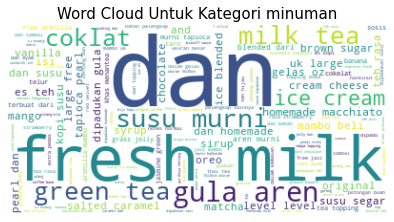

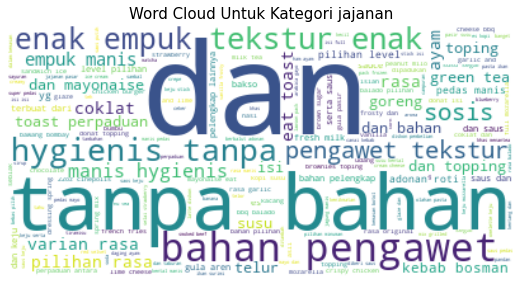

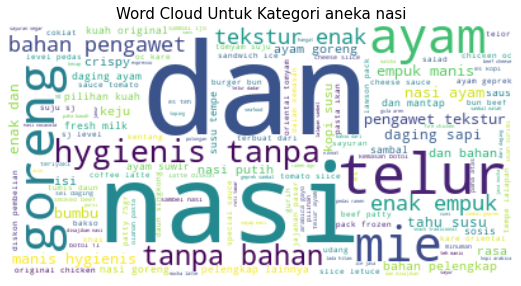

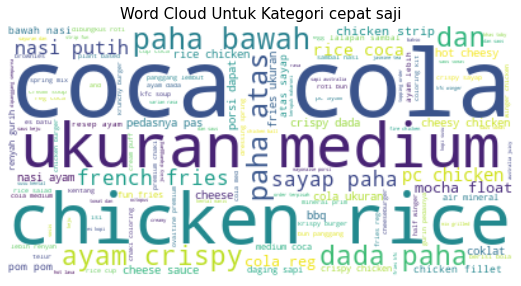

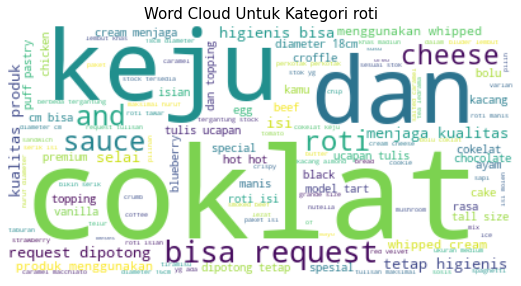

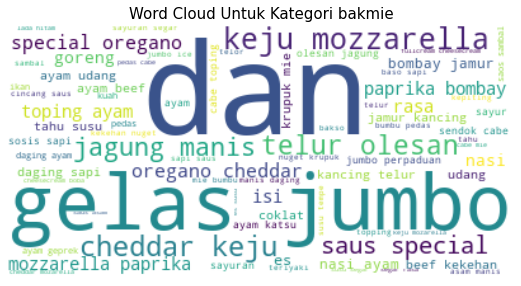

In [ ]:
ax = plt.subplot(321)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[0]
stop_words = ["dengan", "with", "di", "mohon", "maaf", "tidak", "yang", "untuk", "agar", "nya", "ini", "pcs"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[0]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(322)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[1]
stop_words = ["dengan", "yang", "pcs", "ala", "mohon", "maaf", "tidak", "untuk", "agar", "nya", "ini", "with", "di"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[1]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(323)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[2]
stop_words = ["yang", "dengan", "mohon", "maaf", "tidak", "untuk", "agar", "nya", "ini", "pcs", "with", "di", "ml", "ala"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[2]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(324)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[3]
stop_words = ["pcs", "ml", "dengan", "mohon", "maaf", "tidak", "yang", "untuk", "agar", "nya", "ini", "with", "di", "ala"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[3]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(325)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[4]
stop_words = ["dengan", "mohon", "maaf", "tidak", "yang", "untuk", "agar", "nya", "ini", "with", "di", "ala", "pcs"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[4]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(326)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[5]
stop_words = ["dengan", "mohon", "maaf", "tidak", "yang", "untuk", "agar", "nya", "ini", "with", "di", "ala", "pcs", "pc"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[5]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

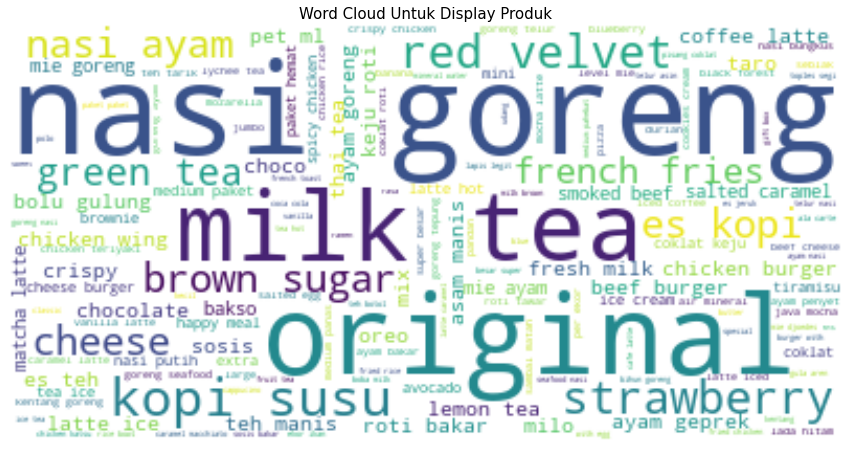

In [ ]:
produk = listToString(data['product'].values)
produk = produk.replace('1l','').replace('(','').replace(')','').replace('/','').replace('+','').replace('-','')
produk = produk.replace('0','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','')
produk = produk.replace('6','').replace('7','').replace('8','').replace('9','').replace('&','').replace(',','')

mpl.rcParams['figure.figsize']=(15,15) 
mpl.rcParams['font.size']=50  
text = produk
stop_words = ["isi", "pcs", "pc", "gr"]
wordcloud = WordCloud(background_color='white', max_words=600,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Display Produk', fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

datadesc['product'] = datadesc['product'].str.replace('ayam','chicken').replace('es','ice')
documents = datadesc['product'].values.tolist()

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top display produk per klaster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("klaster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top display produk per klaster:
klaster 0:
 chicken
 paket
 nasi
 tea
 goreng
 burger
 cheese
 es
 original
 beef
klaster 1:
 latte
 ice
 coffee
 matcha
 caramel
 vanilla
 sandwich
 java
 hot
 mocha


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
